# 0. 1주차 실습코드 재구현
* 선형회귀 모델 구축  
* 새로운 입력 데이터를 보고 반응변수 값을 예측, 평가.

# 1. 데이터셋 가져오기

In [1]:
# 폰트 처리
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,948 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [2]:

# 데이터 전처리 패키지 
import numpy as np
import pandas as pd

#머신러닝 모델 구축
import tensorflow as tf
import keras.preprocessing

# 보스턴 주거 데이터 패키지
from tensorflow.keras.datasets import boston_housing

#데이터 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager


#한글 폰트설정
plt.rc('font',family='NanumBarunGothic')

In [12]:
#보스턴 데이터 가지고 오기
boston = boston_housing.load_data()
# print(boston)

#train - test split

(X_train, y_train), (X_test, y_test) = boston

In [22]:
#데이터 확인 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


print(X_train[0])
print(y_train[0])

(404, 13)
(102, 13)
(404,)
(102,)
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2



# 2. 데이터 전처리

In [24]:
# 데이터 정규화를 진행.
# 데이터에서 평균을 뺀 후 표쥰편차로 나누기.

# 입력 변수 정규화
X_mean = X_train.mean(axis = 0)
X_std = X_train.std(axis = 0)

'''axis=0은 열을 따라 계산 된 산술 평균을 의미하고,
axis=1은 행을 따라 계산 된 산술 평균을 의미합니다.
출처: https://www.delftstack.com/ko/api/numpy/python-numpy-mean/'''

# 입력변수의 평균을 뺀 후 표준편차로 나누기.
X_train -= X_mean
X_train /= X_std

X_test -= X_mean
X_test /= X_std

# 반응 변수 정규화
y_mean = y_train.mean(axis=0) 
y_std = y_test.std(axis=0) 

# 반응 변수의 평균을 뺀 후 표준편차로 나누기.

y_train -= y_mean
y_train /= y_std

y_test -= y_mean
y_test /= y_std

In [26]:
#데이터 확인 
print(X_train[0])
print(y_train[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
-0.7886017042309111


# 3. 모델 생성 & Fitting

In [62]:
# 모델 생성
# Sequential은 레이어를 한 층식 쌓아 올리는 방식

model = tf.keras.Sequential([
  #첫 열은 입력변수가 13개 이므로 첫번째 레이어를 13차원으로 설정
  tf.keras.layers.Dense(units = 52, activation = 'relu', input_shape = (13,)), # 유닛 수를 13의 배수로 설정. 레이어가 추가 될 수록 13의 배수씩 감소.
  tf.keras.layers.Dense(units = 39, activation = 'relu'),
  tf.keras.layers.Dense(units = 26, activation = 'relu'),
  tf.keras.layers.Dense(units = 1) # 출력 값은 linear 하나이므로 출력 유닛을 1로 설정.
])

# compile 메소드를 설정.
# model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mse'])
model.compile(loss = 'mse', optimizer = tf.keras.optimizers.Adam(lr=0.06), metrics = ['mse'])

'''
손실함수는 mse(mean square error), optimizer는 adam이 성능이 가장 좋은것으로 알려져 있음.
'adam' 으로 작성할 수도 있지만 learning rate를 조정하기 위해 다른 방식으로 호출.
metrics 는 평가지표. 훈련과정을 모니터링하는데 사용됨.
'''
model.summary() 

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 52)                728       
                                                                 
 dense_37 (Dense)            (None, 39)                2067      
                                                                 
 dense_38 (Dense)            (None, 26)                1040      
                                                                 
 dense_39 (Dense)            (None, 1)                 27        
                                                                 
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [63]:
# 모델 학습 
history = model.fit(X_train, y_train, epochs = 40, batch_size = 32, validation_split = 0.2)
'''
epochs = 학습을 반복할 횟수
batch_size = 전체 데이터에서 뽑아서 사용할 데이터의 수
validation_split = 데이터셋에서 검증용 데이터를 분리해낼 비율
'''

Epoch 1/40
11/11 [==============================] - 1s 17ms/step - loss: 2.9737 - mse: 2.9737 - val_loss: 0.7417 - val_mse: 0.7417
Epoch 2/40
11/11 [==============================] - 0s 4ms/step - loss: 0.5667 - mse: 0.5667 - val_loss: 0.5812 - val_mse: 0.5812
Epoch 3/40
11/11 [==============================] - 0s 4ms/step - loss: 0.4224 - mse: 0.4224 - val_loss: 0.3386 - val_mse: 0.3386
Epoch 4/40
11/11 [==============================] - 0s 4ms/step - loss: 0.2904 - mse: 0.2904 - val_loss: 0.2834 - val_mse: 0.2834
Epoch 5/40
11/11 [==============================] - 0s 5ms/step - loss: 0.2609 - mse: 0.2609 - val_loss: 0.3099 - val_mse: 0.3099
Epoch 6/40
11/11 [==============================] - 0s 6ms/step - loss: 0.2504 - mse: 0.2504 - val_loss: 0.3002 - val_mse: 0.3002
Epoch 7/40
11/11 [==============================] - 0s 4ms/step - loss: 0.1979 - mse: 0.1979 - val_loss: 0.2605 - val_mse: 0.2605
Epoch 8/40
11/11 [==============================] - 0s 6ms/step - loss: 0.1338 - mse: 0.1

'\nepochs = 학습을 반복할 횟수\nbatch_size = 전체 데이터에서 뽑아서 사용할 데이터의 수\nvalidation_split = 데이터셋에서 검증용 데이터를 분리해낼 비율\n'

# 4. 모델 성능 확인, 회귀값 예측

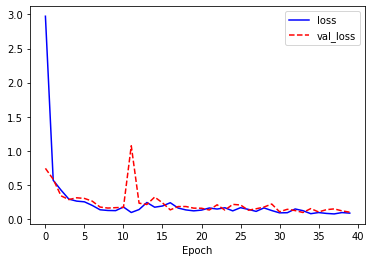

In [64]:
# 그래프 그려서 train, validation 의 epoch별 loss 값 보기 


plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [66]:
# 테스트 셋을 이용하여 회귀 모델을 평가
loss, mse = model.evaluate(X_test, y_test)

print('loss 값: ',loss)
print('mse 값: ', mse)

4/4 [==============================] - 0s 8ms/step - loss: 0.1745 - mse: 0.1745
loss 값:  0.1745281219482422
mse 값:  0.1745281219482422


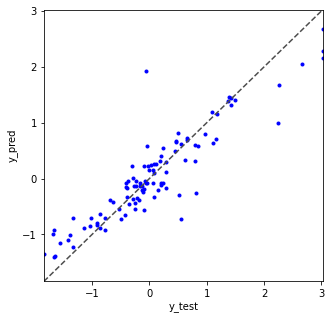

In [67]:
# 실제 주택 가격과 예측한 주택 가격을 시각화
y_pred = model.predict(X_test) #X_test에 대해 모델의 예측한 y값을 저장.

plt.figure(figsize = (5,5))
plt.plot(y_test, y_pred, 'b.')
plt.axis([min(y_test), max(y_test), min(y_test), max(y_test)])

# y=x에 해당하는 대각선
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], ls="--", c=".3")
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()